In [1]:
#import dependencies 
import bs4 as bs
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web
import pickle
import requests
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use("ggplot")

In [2]:
# Create webscrape for s&p500 tickers
resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, "lxml")
table = soup.find('table', {'class': 'wikitable sortable'})

# Create list to hold tickers
# Loop through webscrape for each ticker and add to list
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [ticker.strip('\n') for ticker in tickers]

# Save list of tickers to pickle file
with open("sp500tickers.pickle", "wb") as f:
    pickle.dump(tickers, f)

print(tickers)

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CE', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'COST', 'COTY', 'CCI', 'CS

In [3]:
# Open pickle file of tickers
with open("sp500tickers.pickle", "rb") as f:
    tickers = pickle.load(f)

# Create spreadsheet for stock data    
if not os.path.exists('stock_dfs'):
    os.makedirs('stock_dfs')

#Set timeframe for individual stock data
start = dt.datetime(2014,1,1)
end = dt.datetime(2018,12,31)

# Loop through tickers and pull stock information for each ticker from yahoo
for ticker in tickers:
    print(ticker)
    try:
        # Create individual spreadsheet for each tickers data
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'yahoo', start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))

        else:
            print('Already have {}'.format(ticker))
    except Exception:
        pass       

MMM
Already have MMM
ABT
Already have ABT
ABBV
Already have ABBV
ABMD
Already have ABMD
ACN
Already have ACN
ATVI
Already have ATVI
ADBE
Already have ADBE
AMD
Already have AMD
AAP
Already have AAP
AES
Already have AES
AMG
Already have AMG
AFL
Already have AFL
A
Already have A
APD
Already have APD
AKAM
Already have AKAM
ALK
Already have ALK
ALB
Already have ALB
ARE
Already have ARE
ALXN
Already have ALXN
ALGN
Already have ALGN
ALLE
Already have ALLE
AGN
Already have AGN
ADS
Already have ADS
LNT
Already have LNT
ALL
Already have ALL
GOOGL
Already have GOOGL
GOOG
Already have GOOG
MO
Already have MO
AMZN
Already have AMZN
AEE
Already have AEE
AAL
Already have AAL
AEP
Already have AEP
AXP
Already have AXP
AIG
Already have AIG
AMT
Already have AMT
AWK
Already have AWK
AMP
Already have AMP
ABC
Already have ABC
AME
Already have AME
AMGN
Already have AMGN
APH
Already have APH
APC
Already have APC
ADI
Already have ADI
ANSS
Already have ANSS
ANTM
Already have ANTM
AON
Already have AON
AOS
Alread

In [4]:
# Create DF to hold all stock data
main_df = pd.DataFrame()

# Loop through tickers list 
for count, ticker in enumerate(tickers):
    try:
        # Open individual spreadsheets, set data as index
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index("Date", inplace=True)

        # Rename the ADJ Close column and drop other columns
        df.rename(columns={"Adj Close": ticker}, inplace=True)
        df.drop(["Open","High", "Low", "Close", "Volume"], 1, inplace=True)

        # Add individual stock data to main_df
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how="outer")
        
        #print every 25 times it loops
        if count % 25 == 0:
            print(count)
            
    except Exception:
        pass

# Save main_df to its own spreadsheet
main_df.to_csv("sp500_joined_closes.csv")  

0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500


In [124]:
# Read main stock spreadsheet
df = pd.read_csv("sp500_joined_closes.csv")

# Find correlations between all stocks
df_corr = df.corr()

# Save correlation spreadsheet
df_corr.to_csv("sp500_correlation.csv") 
#print(df_corr.head())

# Set up plot for correlation matrix
corr = df_corr.values
data = pd.DataFrame(corr)

#Choose rows/columns for matrix
rowstart = 300
rowend = 310
columnstart = rowstart
columnend = rowend
select_data = pd.DataFrame(data.iloc[rowstart:rowend,columnstart:columnend])
select_data

,300,301,302,303,304,305,306,307,308,309
300,1.000000,0.220823,-0.288798,-0.349475,-0.305401,-0.268931,-0.099656,-0.053776,-0.368249,0.246701
301,0.220823,1.000000,0.717906,-0.361999,-0.541274,-0.729075,-0.767376,-0.820833,-0.507330,0.373439
302,-0.288798,0.717906,1.000000,-0.179213,-0.324079,-0.534337,-0.629022,-0.698854,-0.331409,0.350599
303,-0.349475,-0.361999,-0.179213,1.000000,0.912512,0.808043,0.581997,0.678212,0.937825,-0.835631
304,-0.305401,-0.541274,-0.324079,0.912512,1.000000,0.916875,0.722684,0.820407,0.920140,-0.853931
305,-0.268931,-0.729075,-0.534337,0.808043,0.916875,1.000000,0.854993,0.909554,0.905121,-0.756780
306,-0.099656,-0.767376,-0.629022,0.581997,0.722684,0.854993,1.000000,0.908967,0.652737,-0.518596
307,-0.053776,-0.820833,-0.698854,0.678212,0.820407,0.909554,0.908967,1.000000,0.753282,-0.627833
308,-0.368249,-0.507330,-0.331409,0.937825,0.920140,0.905121,0.652737,0.753282,1.000000,-0.814461
309,0.246701,0.373439,0.350599,-0.835631,-0.853931,-0.756780,-0.518596,-0.627833,-0.814461,1.000000


<IPython.core.display.Javascript object>


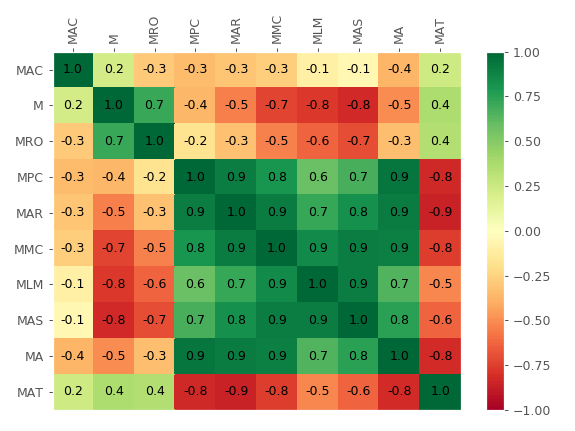

In [125]:
# Create plot of correlations
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

heatmap = ax.pcolor(select_data,cmap=plt.cm.RdYlGn)

for y in range(select_data.shape[0]):
    for x in range(select_data.shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.1f' % select_data[y+rowstart][x+rowstart],
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='Black'
                 )
        
fig.colorbar(heatmap)
ax.set_xticks(np.arange(select_data.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(select_data.shape[1]) + 0.5, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()


column_labels = df_corr.iloc[rowstart:rowend,columnstart:columnend].columns
row_labels = df_corr.iloc[rowstart:rowend,columnstart:columnend].index

ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_labels)
plt.xticks(rotation=90)
heatmap.set_clim(-1,1)
plt.tight_layout()
plt.show
plt.savefig('full_matrix.png')
    
  